In [4]:
import json
from datetime import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

In [5]:
#_creating default figure size of matplotlib
plt.rcParams['figure.figsize'] = 10.0, 5.0

In [6]:
def plot_line_graph(x_values, total_y_values, listener_y_values, visitor_y_values,x_label, y_label, title):
    plt.plot(x_values, total_y_values, label= 'Total Complexity')
    plt.plot(x_values, listener_y_values, label= 'Listener Complexity')
    plt.plot(x_values, visitor_y_values, label= 'Visitor Complexity')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend(loc="upper left")
    plt.show()

In [7]:
def plot_bar_graph(x_values, listener_repo_cnt, visitor_repo_cnt, listener_visitor_repo_cnt):
    locations = np.arange(len(x_values)) 
    width = 0.15 #_considering width as size of each bar

    #_plotting bar graphs for each fruit frequency 
    plt.bar(locations - 0.15, listener_visitor_repo_cnt, width, label='Commits with both Listener and Visitor change',  color = "blue", edgecolor = "k", hatch="\\")
    plt.bar(locations, listener_repo_cnt, width, label='Commits with Listener change', color = "orange", edgecolor = "k", hatch="/")
    plt.bar(locations + 0.15, visitor_repo_cnt, width, label='Commits with Visitor change',  color = "green", edgecolor = "k", hatch=".")

    #_mapping x labels to the graph
    plt.xticks(np.arange(len(x_values)), x_values)
    plt.ylabel('No. of unique commits')
    plt.title('Commit frequencies of Antlr4 Patterns')
    plt.legend()
    plt.show()

In [8]:
def get_repo_pattern_cnt(commit_id_list, pattern_type):
    repo_commit_bar_df = repo_commit_df.loc[repo_commit_df['commit_group_id'].isin(commit_id_list)]
    if pattern_type == 'listener_visitor':
        repo_commit_bar_df = repo_commit_bar_df.loc[(repo_commit_bar_df['listener_complexity'] > 0) & (repo_commit_bar_df['visitor_complexity'] > 0)]
    else:
        repo_commit_bar_df = repo_commit_bar_df.loc[repo_commit_bar_df[pattern_type] > 0]
    return len(repo_commit_bar_df.index)

In [9]:
def get_commit_compleity_data(repo_id, commit):
    listener_complexity = 0
    visitor_complexity = 0
    for antlr_file in commit['_changed_files_list']:
        listener_complexity += (antlr_file['_enter_cnt'] + antlr_file['_exit_cnt'])
        visitor_complexity += antlr_file['_visit_cnt']
    return (repo_id, commit['_commit_index'], commit['_sha_id'], commit['_timestamp'], (listener_complexity + visitor_complexity), listener_complexity, visitor_complexity)

In [10]:
def get_repo_pattern_map(repo_pattern_comp_df):
    repo_pattern_list = []
    for repo_id, listener_cnt, visitor_cnt in zip(repo_pattern_comp_df['repo_index'], repo_pattern_comp_df['listener_complexity'], repo_pattern_comp_df['visitor_complexity']):
        if listener_cnt > visitor_cnt:
            repo_pattern_list.append((repo_id, 'listener'))
        elif visitor_cnt > listener_cnt:
            repo_pattern_list.append((repo_id, 'visitor'))
    return repo_pattern_list

In [11]:
with open('final_repo_data.json', "r", encoding='utf-8', errors='ignore') as infile:
    repo_info_list = []
    repo_commit_data_list = []
    json_object_list = json.load(infile, strict=False)
    for repo in json_object_list:
        repo_info_list.append((repo['_repo_id'], repo['_repo_name'], repo['_total_commits'], len(repo['_commit_history'])))
        for commit in repo['_commit_history']:
            repo_commit_data_list.append(get_commit_compleity_data(repo['_repo_id'], commit))

In [12]:
repo_info_df = pd.DataFrame(repo_info_list, columns=['repo_index', 'repo_name', 'repo_total_commits', 'mined_commits'])
repo_info_df.set_index('repo_index', inplace=True)
repo_info_df.sort_values('repo_index', ascending=True, inplace=True)
repo_info_df

,repo_name,repo_total_commits,mined_commits
repo_index,,,
1,4455jkjh/Apktool-android,9,5
2,52Jolynn/SqlParser,36,10
3,Adrodoc/MPL,703,10
4,AlanHohn/antlr4-python,7,2
5,Andyccs/sqat,181,10
...,...,...,...
434,zendesk/maxwell,2965,10
435,zhegexiaohuozi/JsoupXpath,168,10
436,zhunki/skyfire,25,10


In [13]:
repo_info_df = repo_info_df.loc[repo_info_df['mined_commits'] > 9]
repo_info_df.shape

(411, 3)

In [26]:
repo_commit_df = pd.DataFrame(repo_commit_data_list, columns=['repo_index', 'commit_id', 'hash_id', 'timestamp', 'complexity', 'listener_complexity', 'visitor_complexity'])
repo_commit_df.sort_values(['repo_index', 'commit_id'], ascending=[True, True], inplace=True)
repo_commit_df.head(50)

,repo_index,commit_id,hash_id,timestamp,complexity,listener_complexity,visitor_complexity
2165,1,1,2e0679cb43e155549d364529801c070fac311db1,2019-02-23 17:00:54+00:00,0,0,0
2166,1,4,8c212d9f4352788498e802acd961fed72ef6e35f,2019-02-24 20:53:29+08:00,50,0,50
2167,1,6,fb1f556579e93c7bd23a4a9bd946533043e618fc,2019-03-10 22:31:35+08:00,0,0,0
2168,1,7,6b6abb2bf9c6b0feccd658053a531cb75280e8f5,2019-04-08 19:10:33+08:00,111,0,111
2169,1,9,4c1841a582d1e79cb87d9221f948cf06a63e8384,2019-05-16 21:51:33+08:00,111,0,111
1814,2,1,721ea31c41e0aaaa59467f1501375c949730bec3,2014-05-05 22:20:35-07:00,0,0,0
1817,2,2,397fd80d7430378f85b28a184165739b81e2e947,2014-05-07 09:22:24+08:00,0,0,0
1822,2,5,458ca864cc81c850fb7f754eb3b8cfe75697560a,2014-05-07 15:44:50+08:00,0,0,0
1816,2,10,e230e5d12aba11e8778b314eb02d2da17c940d56,2014-05-14 18:23:59+08:00,0,0,0
1821,2,12,29d360b3b2d8cb038401ea123a007b369835b8de,2014-05-15 16:01:27+08:00,0,0,0


In [24]:
initial_repo_index = 1
previous_visit_complexity = 0
previous_listener_complexity = 0

for df_id, repo_index, visit_comp, listener_comp in zip(repo_commit_df.index, repo_commit_df['repo_index'], repo_commit_df['visitor_complexity'], repo_commit_df['listener_complexity']):
    
    if initial_repo_index == repo_index:
        if visit_comp != 0:
            previous_visit_complexity = visit_comp
        elif visit_comp == 0:
            repo_commit_df.at[df_id, 'visitor_complexity'] = previous_visit_complexity
            
            
        if listener_comp != 0:
            previous_listener_complexity = listener_comp
        elif listener_comp == 0:
            repo_commit_df.at[df_id, 'listener_complexity'] = previous_listener_complexity
        
        repo_commit_df.at[df_id, 'complexity'] = (previous_listener_complexity + previous_visit_complexity)
        
    else:
        initial_repo_index = repo_index
        previous_visit_complexity = visit_comp
        previous_listener_complexity = listener_comp

In [25]:
repo_commit_df.head(50)

,repo_index,commit_id,hash_id,timestamp,complexity,listener_complexity,visitor_complexity
2165,1,1,2e0679cb43e155549d364529801c070fac311db1,2019-02-23 17:00:54+00:00,0,0,0
2166,1,4,8c212d9f4352788498e802acd961fed72ef6e35f,2019-02-24 20:53:29+08:00,50,0,50
2167,1,6,fb1f556579e93c7bd23a4a9bd946533043e618fc,2019-03-10 22:31:35+08:00,50,0,50
2168,1,7,6b6abb2bf9c6b0feccd658053a531cb75280e8f5,2019-04-08 19:10:33+08:00,111,0,111
2169,1,9,4c1841a582d1e79cb87d9221f948cf06a63e8384,2019-05-16 21:51:33+08:00,111,0,111
1814,2,1,721ea31c41e0aaaa59467f1501375c949730bec3,2014-05-05 22:20:35-07:00,0,0,0
1817,2,2,397fd80d7430378f85b28a184165739b81e2e947,2014-05-07 09:22:24+08:00,0,0,0
1822,2,5,458ca864cc81c850fb7f754eb3b8cfe75697560a,2014-05-07 15:44:50+08:00,0,0,0
1816,2,10,e230e5d12aba11e8778b314eb02d2da17c940d56,2014-05-14 18:23:59+08:00,0,0,0
1821,2,12,29d360b3b2d8cb038401ea123a007b369835b8de,2014-05-15 16:01:27+08:00,0,0,0


In [27]:
repo_index_list = list(repo_info_df.index)
repo_commit_df = repo_commit_df.loc[repo_commit_df['repo_index'].isin(repo_index_list)]
repo_commit_df.shape

(4110, 7)

In [28]:
commit_group_index_list = []
sample_list = range(1, 11)
for value in range(len(repo_info_df.index)):
    commit_group_index_list.extend(sample_list)
repo_commit_df['commit_group_id'] = commit_group_index_list
repo_commit_df.shape

(4110, 8)

In [29]:
repo_complexity_df = repo_commit_df.groupby('repo_index', as_index=False)['complexity'].sum()
repo_complexity_df = repo_complexity_df.loc[repo_complexity_df['complexity'] != 0.0]
repo_complexity_df.shape

(264, 2)

In [30]:
repo_commit_df = repo_commit_df.loc[repo_commit_df['repo_index'].isin(repo_complexity_df.repo_index)]
repo_commit_df.shape

(2640, 8)

In [31]:
avg_commit_comp_df = repo_commit_df.groupby('commit_group_id', as_index=False)['complexity'].mean()
total_y_values = avg_commit_comp_df['complexity']
avg_commit_comp_df = repo_commit_df.groupby('commit_group_id', as_index=False)['listener_complexity'].mean()
listener_y_values = avg_commit_comp_df['listener_complexity']
avg_commit_comp_df = repo_commit_df.groupby('commit_group_id', as_index=False)['visitor_complexity'].mean()
visitor_y_values = avg_commit_comp_df['visitor_complexity']

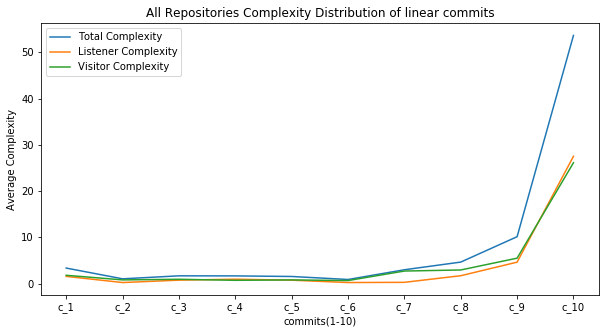

In [32]:
x_values = ['c_'+str(value) for value in avg_commit_comp_df['commit_group_id']]
plot_line_graph(x_values, total_y_values, listener_y_values, visitor_y_values, "commits(1-10)", "Average Complexity", "All Repositories Complexity Distribution of linear commits")

In [19]:
listener_repo_cnt = []
visitor_repo_cnt = []
listener_visitor_repo_cnt =  []

listener_repo_cnt.append(get_repo_pattern_cnt(range(1, 10), 'listener_complexity'))
listener_repo_cnt.append(get_repo_pattern_cnt([10], 'listener_complexity'))
visitor_repo_cnt.append(get_repo_pattern_cnt(range(1, 10), 'visitor_complexity'))
visitor_repo_cnt.append(get_repo_pattern_cnt([10], 'visitor_complexity'))
listener_visitor_repo_cnt.append(get_repo_pattern_cnt(range(1, 10), 'listener_visitor'))
listener_visitor_repo_cnt.append(get_repo_pattern_cnt([10], 'listener_visitor'))

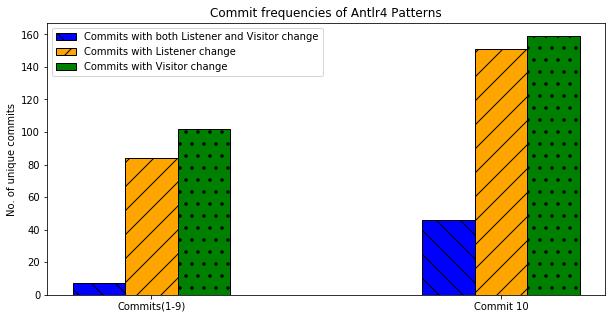

In [20]:
x_values_bar_graph = ['Commits(1-9)', 'Commit 10']
plot_bar_graph(x_values_bar_graph, listener_repo_cnt, visitor_repo_cnt, listener_visitor_repo_cnt)

In [21]:
repo_pattern_comp_df = repo_commit_df.loc[repo_commit_df['commit_group_id'] == 10]
repo_pattern_list_10 = get_repo_pattern_map(repo_pattern_comp_df)

In [22]:
repo_pattern_comp_df = repo_commit_df.loc[repo_commit_df['commit_group_id'].isin(range(1, 7))]
sum_commit_comp_df = repo_pattern_comp_df.groupby('repo_index', as_index=False)['listener_complexity', 'visitor_complexity'].sum()
repo_pattern_list_1_6 = get_repo_pattern_map(sum_commit_comp_df)

In [23]:
repo_pattern_df_10 = pd.DataFrame(repo_pattern_list_10, columns=['repo_index', 'end_antlr_pattern'])
repo_pattern_df_10.set_index('repo_index', inplace=True)
repo_pattern_df_1_6 = pd.DataFrame(repo_pattern_list_1_6, columns=['repo_index', 'start_antlr_pattern'])
repo_pattern_df_1_6.set_index('repo_index', inplace=True)
repo_pattern_df = pd.merge(repo_pattern_df_1_6, repo_pattern_df_10, on = 'repo_index', how='outer')
repo_pattern_df

,start_antlr_pattern,end_antlr_pattern
repo_index,,
6,listener,listener
7,visitor,visitor
9,listener,listener
18,visitor,visitor
20,listener,listener
...,...,...
433,NaN,visitor
434,NaN,listener
435,NaN,visitor


In [24]:
listener_cnt = len(repo_pattern_df.loc[repo_pattern_df['start_antlr_pattern'] == 'listener'])
visitor_cnt = len(repo_pattern_df.loc[repo_pattern_df['start_antlr_pattern'] == 'visitor'])
print(f'No.of Repositories with visitor pattern at the start(considering commits(1-6)) {listener_cnt}')
print(f'No.of Repositories with visitor pattern at the start(considering commits(1-6)) {visitor_cnt}')

No.of Repositories with visitor pattern at the start(considering commits(1-6)) 24
No.of Repositories with visitor pattern at the start(considering commits(1-6)) 26


In [25]:
print(f'Final No.of Repositories ..... {len(repo_pattern_df.index)}')
listener_cnt = len(repo_pattern_df.loc[repo_pattern_df['end_antlr_pattern'] == 'listener'])
visitor_cnt = len(repo_pattern_df.loc[repo_pattern_df['end_antlr_pattern'] == 'visitor'])
print(f'No.of Repositories with visitor pattern at the end(after commit 10) {listener_cnt}')
print(f'No.of Repositories with visitor pattern at the end(after commit 10) {visitor_cnt}')

Final No.of Repositories ..... 262
No.of Repositories with visitor pattern at the end(after commit 10) 129
No.of Repositories with visitor pattern at the end(after commit 10) 133


In [31]:
pattern_switch_cnt = 0
for repo_index, start_pattern, end_pattern in zip(repo_pattern_df.index, repo_pattern_df['start_antlr_pattern'], repo_pattern_df['end_antlr_pattern']):
    if start_pattern in ('visitor', 'listener') and start_pattern != end_pattern:
        print(f'Repository {repo_index} switched from {start_pattern} pattern to {end_pattern}')
        pattern_switch_cnt += 1
print(f'No.of Repositories switched antlr patterns - {pattern_switch_cnt}')

Repository 205 switched from listener pattern to visitor
Repository 329 switched from visitor pattern to listener
No.of Repositories switched antlr patterns - 2
